In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px

In [2]:
df = pd.read_csv('./data/covid_impact_on_airport_traffic.csv')
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


# EDA

In [3]:
df.shape

(7247, 11)

In [4]:
df.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [6]:
df.describe(include='all')

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
count,7247,7247,7247.0,7247,7247.000000,7247,7247,7247,7247,7247,7247
unique,1,262,NaN,28,NaN,28,27,23,23,4,28
top,Daily,2020-04-03,NaN,Hartsfield-Jackson Atlanta International,NaN,POINT(-84.4279188822754 33.6410758198944),New York,New York,US-NY,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
freq,7247,28,NaN,262,NaN,262,523,523,523,4441,262
mean,NaN,NaN,1.0,NaN,66.651442,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,22.134433,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.0,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.0,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.0,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
min(df.Date),max(df.Date)

('2020-03-16', '2020-12-02')

In [6]:
len(df.AirportName.unique())

28

In [7]:
df.dtypes

AggregationMethod     object
Date                  object
Version              float64
AirportName           object
PercentOfBaseline      int64
Centroid              object
City                  object
State                 object
ISO_3166_2            object
Country               object
Geography             object
dtype: object

# Feature engineering

In [8]:
"""
changing date colum to datetime dtype
"""
def change_date_to_dt(df: pd.DataFrame, column: str ='Date'):
    return df[column].astype('datetime64[ns]')
    
df['Date'] = change_date_to_dt(df)

In [9]:
"""
I don't know what the Version colomn is and it doesn't look like an important feature so i'll delete it
Aggregation count also has only 1 value: 'Daily' so i'll delete it aswell
"""
df.drop(['Version','AggregationMethod'], axis=1, inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
"""
It might be a usefull feature to be able to show data for each day of the week 
"""
df['DayOfWeek'] = 0
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for idx, cell in enumerate(df['Date']):
    df['DayOfWeek'][idx] = days[cell.weekday()]

C:\Users\arnel\AppData\Local\Temp\ipykernel_23220\757433858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'][idx] = days[cell.weekday()]


In [13]:
"""
extracting the month from the date
"""
months = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sept', 'Okt', 'Nov', 'Dec']
df['Months'] = df['Date'].dt.month_name(locale='English')

In [12]:
"""
Since I'm going to plot the data on a map it's probably usefull to have the Centroid data in long and lat
"""
df['Lat'] = 0
df['Lon'] = 0

for idx, cell in enumerate(df['Centroid']):
    lat, lon = cell[6:-1].split(' ')
    df['Lat'][idx] = lat
    df['Lon'][idx] = lon

df.drop('Centroid', axis=1, inplace=True)

df['Lon'] = df['Lon'].astype('float')
df['Lat'] = df['Lat'].astype('float')

C:\Users\arnel\AppData\Local\Temp\ipykernel_23220\3206965688.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lat'][idx] = lat
C:\Users\arnel\AppData\Local\Temp\ipykernel_23220\3206965688.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lon'][idx] = lon


# Data analysis

## Date/ time related data

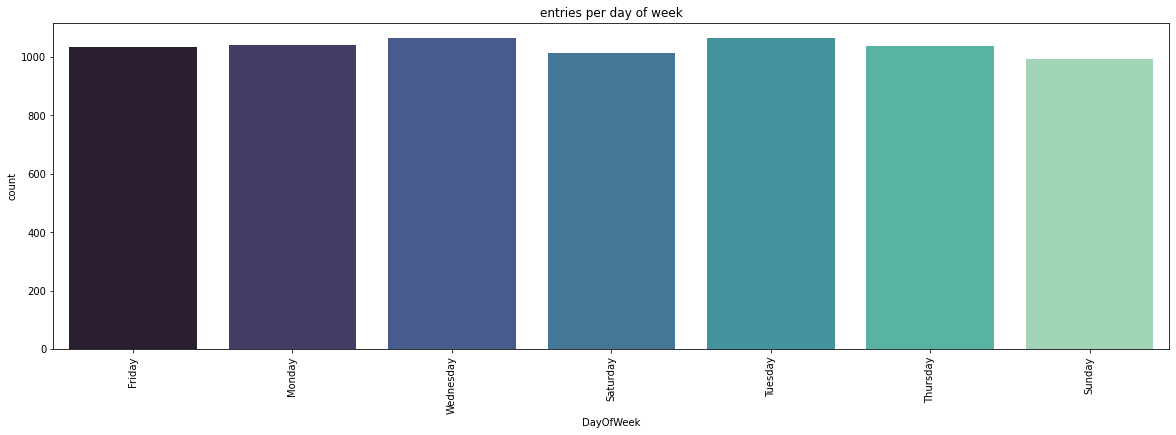

In [14]:
"""
Checking amount of entries per weekday
"""
def weekday_entries(df: pd.DataFrame):
    plt.figure(figsize=(20,6))
    fig = sns.countplot(x = "DayOfWeek", data = df, palette = "mako")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    fig.set_title(f"entries per day of week")
    plt.show();

weekday_entries(df)

<p>We see that the amount of entries is basically the same for each day of the week</p>

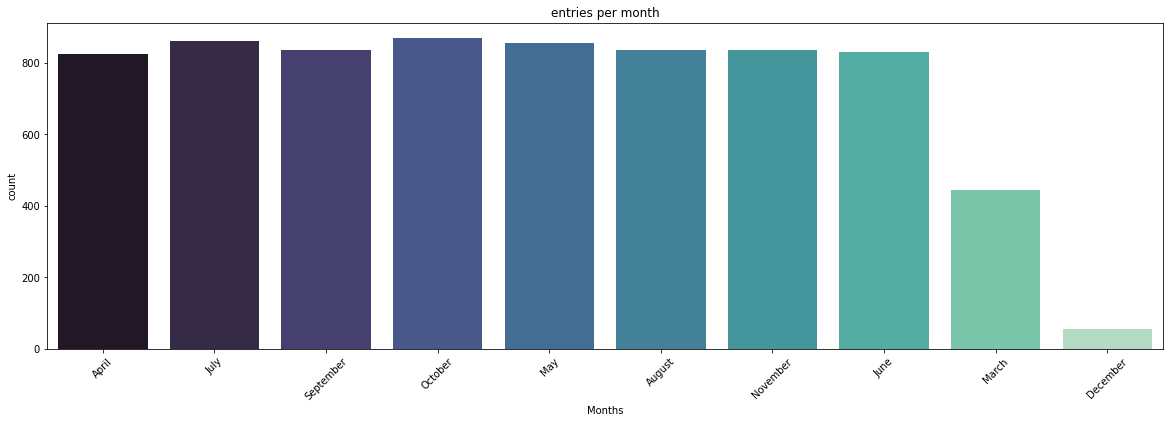

In [15]:
"""
checking amount of entries per month
"""
def monthly_entries(df: pd.DataFrame):
    plt.figure(figsize=(20,6))
    fig = sns.countplot(x = df['Months'], data = df, palette = "mako")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
    fig.set_title(f"entries per month")
    plt.show();
monthly_entries(df)

In [16]:
min(df[df['Months'] == 'December']['Date']), max(df[df['Months'] == 'December']['Date'])

(Timestamp('2020-12-01 00:00:00'), Timestamp('2020-12-02 00:00:00'))

In [17]:
min(df[df['Months'] == 'April']['Date']), max(df[df['Months'] == 'April']['Date'])

(Timestamp('2020-04-01 00:00:00'), Timestamp('2020-04-30 00:00:00'))

In [49]:
min(df["Date"]), max(df["Date"])

(Timestamp('2020-03-16 00:00:00'), Timestamp('2020-12-02 00:00:00'))

In [19]:
df[df['Months'] == 'December']['Date'].value_counts()

2020-12-01    28
2020-12-02    28
Name: Date, dtype: int64

In [20]:
"""
feature engineering the covid data
"""
covid_df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv',parse_dates = ['Date'])
covid_df['Total Confirmed'] = covid_df[['Confirmed']].sum(axis = 1)
covid_df.drop(['Recovered','Confirmed', 'Deaths'], axis=1, inplace=True)

In [21]:
"""
Plotting the percent of baseline on map view
"""
def plot_heatmap(df: pd.DataFrame):
    fig = px.scatter_mapbox(df,
                            lat="Lon",
                            lon="Lat",
                            hover_name="AirportName",
                            hover_data=["PercentOfBaseline"],
                            color="PercentOfBaseline",
                            zoom=1,
                            height=600,
                            size="PercentOfBaseline",
                            size_max=30,
                            opacity=0.4,
                            width=1300)
    fig.update_layout(mapbox_style='stamen-terrain')
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.update_layout(title_text="Mean of trafic on sunday")
    fig.show()
    
plot_heatmap(df)

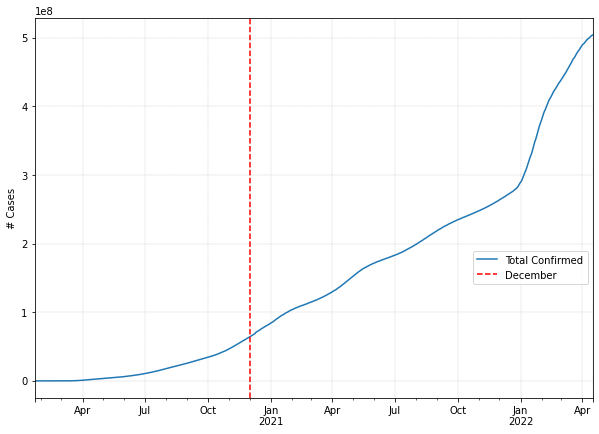

In [22]:
"""
Comparing corona cases to check if there is a correlation between the decreased amount of flights in march & December
"""
def plot_corona_cases():
    c = covid_df.groupby(['Date']).sum().plot(figsize = (10, 7))
    c.set_xlabel('Month')
    c.set(xlabel = None)
    c.set_ylabel('# Cases')
    plt.axvline(x="2020-12-01", color='red', label='December', linestyle='--')
    plt.grid(linestyle = '--', linewidth = 0.3)
    plt.legend(bbox_to_anchor=(1.0, 0.4))

    plt.show()
plot_corona_cases()

## Location related data

In [23]:
"""
function to plot the entries for location X
df: dataframe
location: airport, city, state or country category from the dataframe
"""
def plot_entries_to_x(df: pd.DataFrame, location: str):
    plt.figure(figsize=(20,6))
    fig = sns.countplot(x = location, data = df, palette = "mako")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
    fig.set_title(f"entries per {location}")
    plt.show();

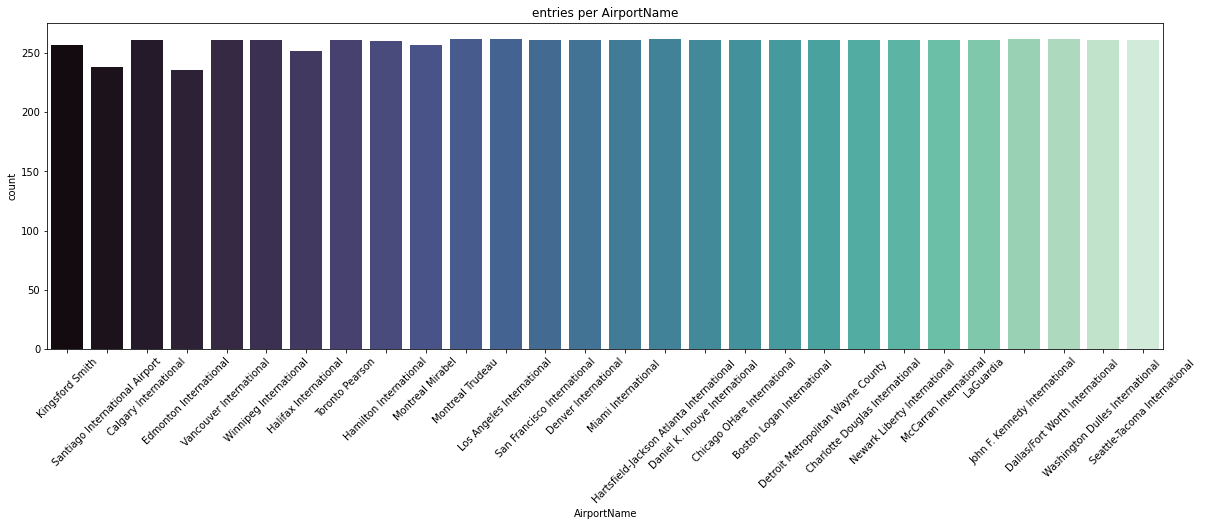

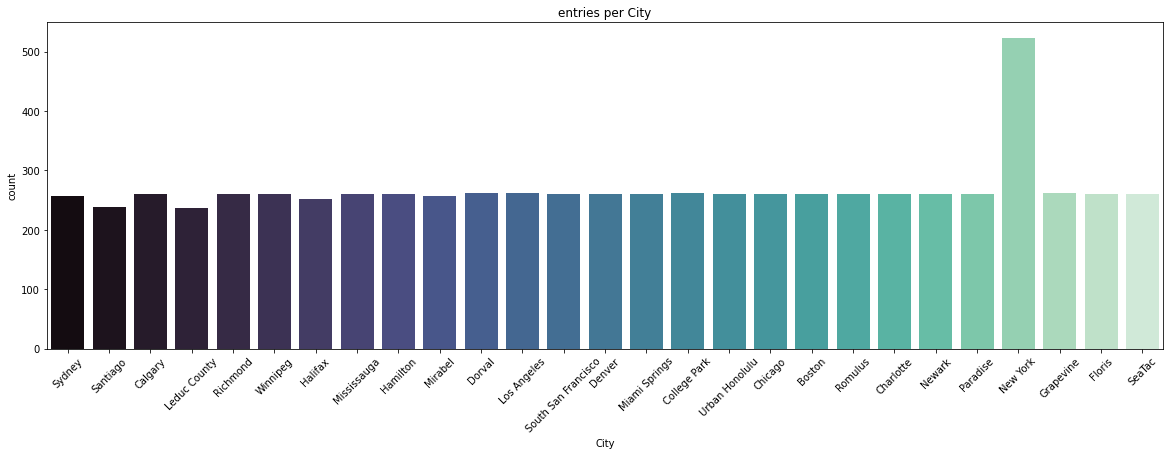

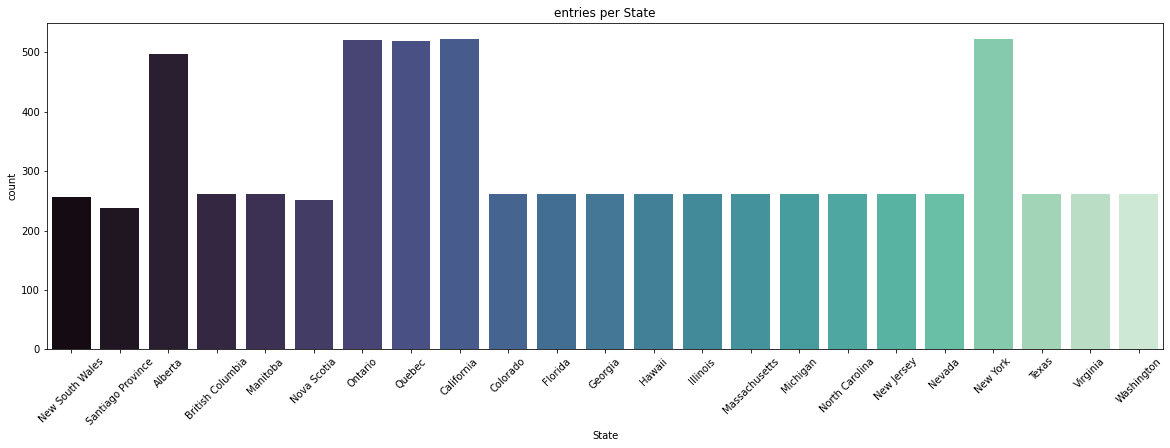

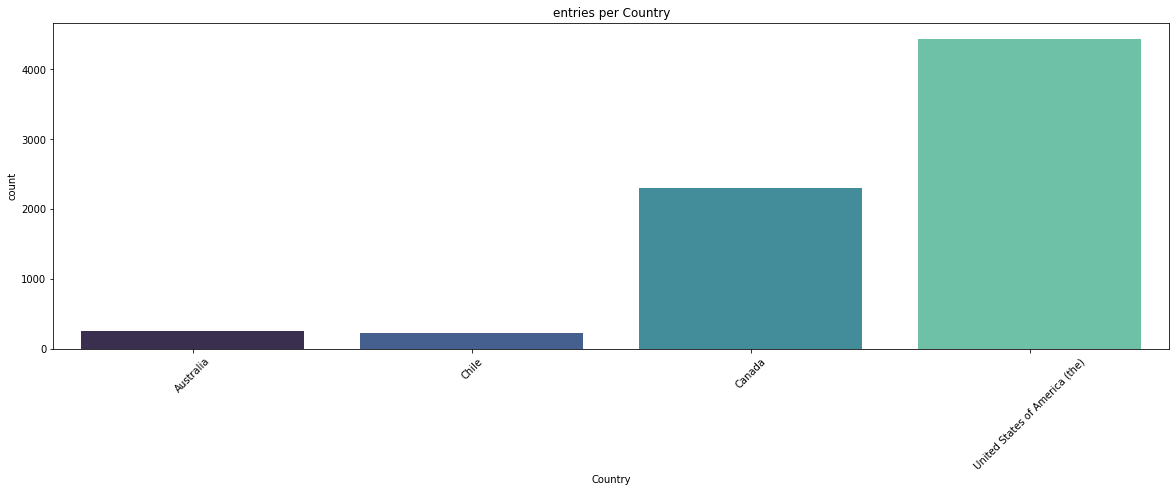

In [24]:
for col in ['AirportName', 'City', 'State', 'Country']:
    plot_entries_to_x(df, col)

In [25]:
"""
function to get amount of airports per location
df: dataframe
location_type: airport, city, state or country category from the dataframe
location: specific location (i.e. Canada, 'Florida', 'New York', 'JFK airport')
"""
def get_amount_of_airports_per_location(df: pd.DataFrame, location_type: str, location: str):
    return len(df["AirportName"][df[location_type] == location].unique())

In [26]:
for country in df['Country'].unique():
    print(f"Airports in {country}: {get_amount_of_airports_per_location(df, 'Country', country)}")

Airports in Australia: 1
Airports in Chile: 1
Airports in Canada: 9
Airports in United States of America (the): 17


In [27]:
df['Lon'].unique()

array([-33.9459775 , -33.39072653,  51.11847537,  53.3087831 ,
        49.19357886,  49.90247126,  44.88301684,  43.67935236,
        43.17203608,  45.6815027 ,  45.46784369,  33.94136938,
        37.62118755,  39.86434682,  25.79572431,  33.64107582,
        21.32596525,  41.98046004,  42.36363304,  42.2129726 ,
        35.21368923,  40.69150338,  36.08285398,  40.7738835 ,
        40.64602659,  32.89405904,  38.94759392,  47.45058289])

In [28]:
"""
extract coordinates from the dataframe
"""
def get_airport_coords(df: pd.DataFrame):
    lon = df['Lon'].unique()
    lat = df['Lat'].unique()
    return lon,lat

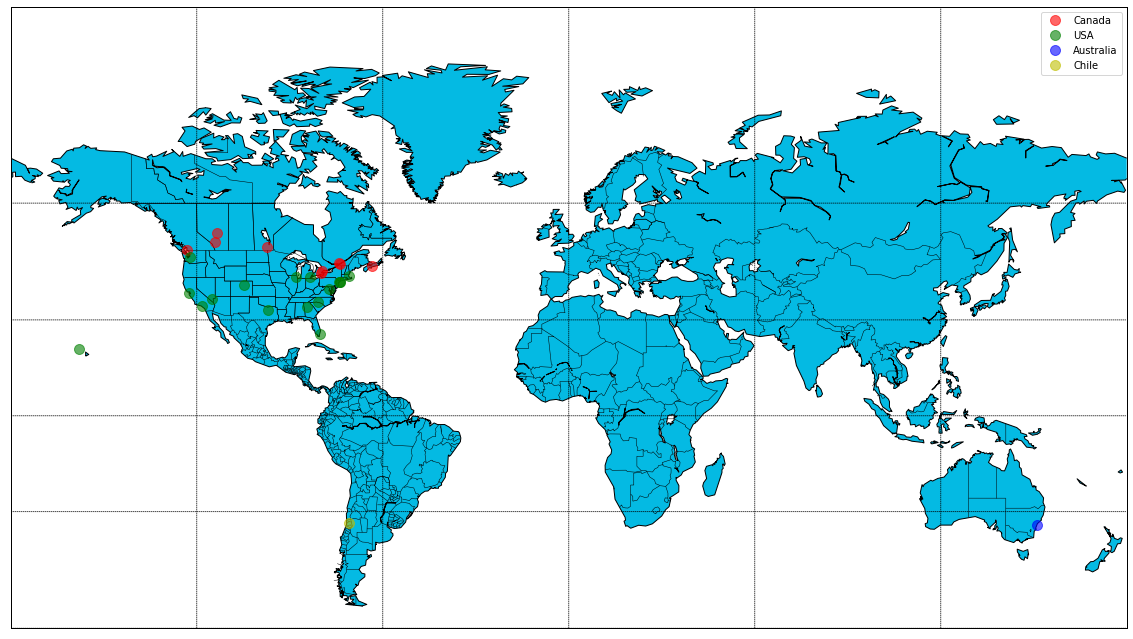

In [29]:
"""
plotting the airports
"""
def plot_airports(df: pd.DataFrame):

    lon_can, lat_can = get_airport_coords(df[df['Country'] == 'Canada'])
    lon_usa, lat_usa = get_airport_coords(df[df['Country'] == 'United States of America (the)'])
    lon_aus, lat_aus = get_airport_coords(df[df['Country'] == 'Australia'])
    lon_chi, lat_chi = get_airport_coords(df[df['Country'] == 'Chile'])

    
    plt.figure(figsize=(20,15))

    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')
    m.drawcountries()
    m.drawstates()
    m.drawcoastlines()
    m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
    m.drawparallels(np.arange(-90.,91.,30.))
    m.drawmeridians(np.arange(-180.,181.,60.))
    
    x,y = m(lat_can, lon_can)
    m.plot(x,y,'ro',markersize=10,alpha=.6, label='Canada')

    x,y = m(lat_usa, lon_usa)
    m.plot(x,y,'go',markersize=10,alpha=.6, label='USA')

    x,y = m(lat_aus, lon_aus)
    m.plot(x,y,'bo',markersize=10,alpha=.6, label='Australia')

    x,y = m(lat_chi, lon_chi)
    m.plot(x,y,'yo',markersize=10,alpha=.6, label='Chile')

    m.drawmapboundary(fill_color='#FFFFFF')
    plt.legend(loc='best')
    plt.show()
plot_airports(df)

## Covid related data

In [30]:
"""
function that calculates the mean percent of baseline per airport
df: dataframe
airport: specific airport (i.e. 'JFK airport')
"""

def mean_percent_of_baseline_per_airport(df: pd.DataFrame, airport: str):
    return df['PercentOfBaseline'][df['AirportName'] == airport].mean()

mean_percent_per_airport = {}
for airport in df['AirportName'].unique():
    mean_percent_per_airport[airport] =  mean_percent_of_baseline_per_airport(df, airport)


In [31]:
"""
Plotting the mean percent of baseline per airport
"""

def plot_percent_of_baseline_per_airport(df: pd.DataFrame, airport: str):
    plt.figure(figsize=(20,6))
    plt.bar(mean_percent_per_airport.keys(), mean_percent_per_airport.values())
    plt.xlabel('Airport')
    plt.ylabel('Percent of baseline')
    plt.tick_params(axis='x', rotation=45)
    plt.show();

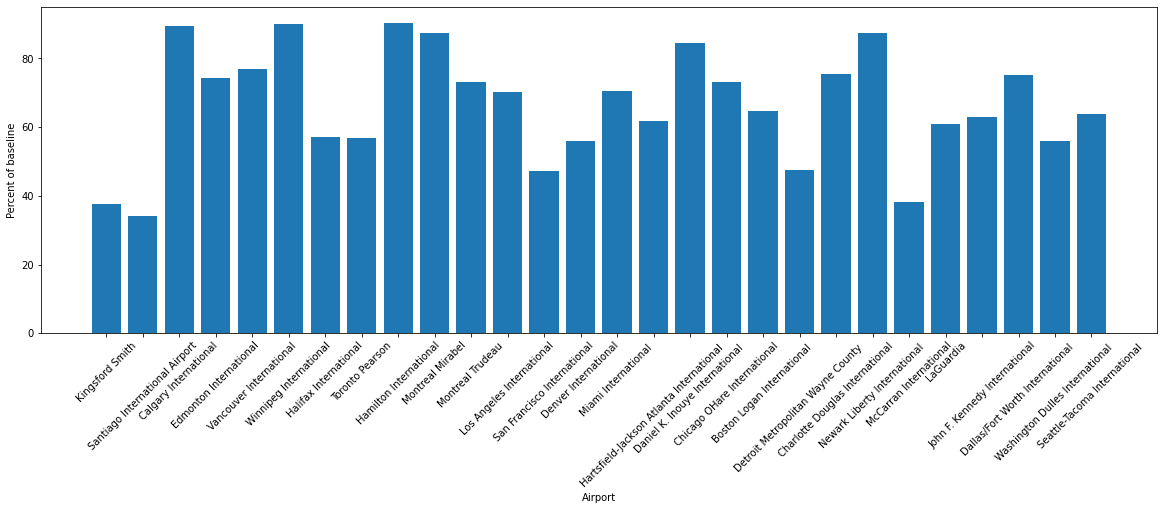

In [32]:
plot_percent_of_baseline_per_airport(df, 'Kingsford Smith')

In [33]:
"""
Plotting the percent of baseline on map view
"""
def plot_heatmap(df: pd.DataFrame):
    fig = px.scatter_mapbox(df,
                            lat="Lon",
                            lon="Lat",
                            hover_name="AirportName",
                            hover_data=["PercentOfBaseline"],
                            color="PercentOfBaseline",
                            zoom=1,
                            height=600,
                            size="PercentOfBaseline",
                            size_max=30,
                            opacity=0.4,
                            width=1300)
    fig.update_layout(mapbox_style='stamen-terrain')
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.update_layout(title_text="Mean of trafic on sunday")
    fig.show()
    
plot_heatmap(df)

In [34]:
"""
returns sorted dictionary based on the PercentOfBaseline
amount: amount of airports to show
"""

def sorted_impact_on_airports(amount: int =-1):
	return [(key, value) for (key, value) in sorted(mean_percent_per_airport.items(), key=lambda x: x[1])][:amount]

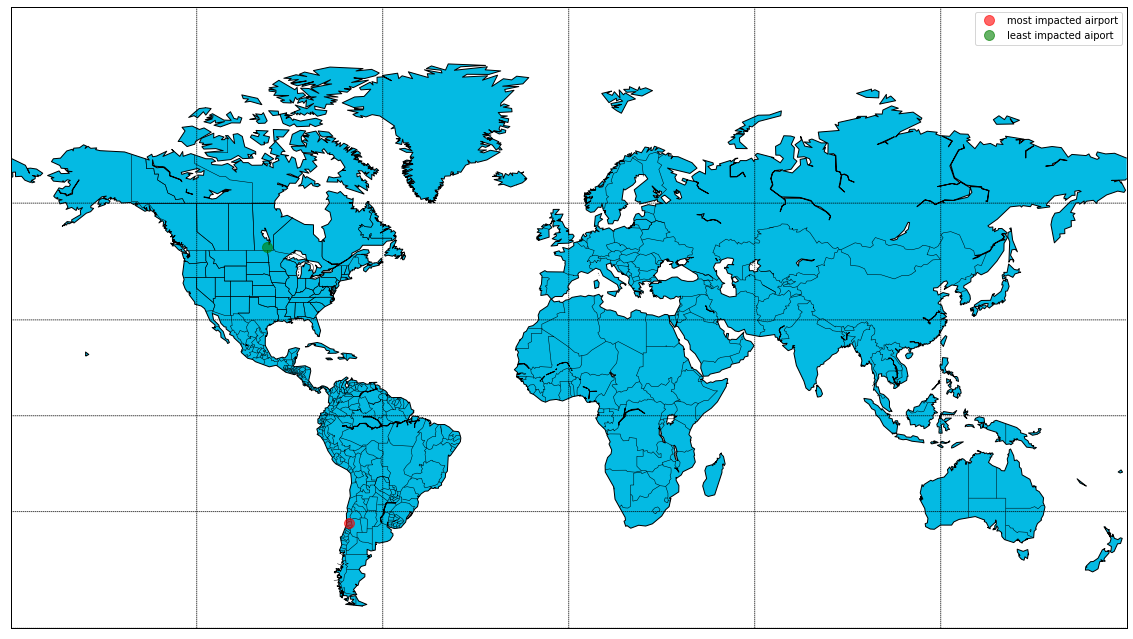

In [35]:
"""
plotting the least and most impacted airports
"""
def plot_impact_airports(df: pd.DataFrame):

    most_impacted_airport = sorted_impact_on_airports(1)[0]
    least_impacted_airport = sorted_impact_on_airports()[-1]

    most_impacted_df = df[(df['AirportName'] == most_impacted_airport[0])]
    least_impacted_df = df[(df['AirportName'] == least_impacted_airport[0])]

    lon_most, lat_most = get_airport_coords(most_impacted_df)
    lon_least, lat_least = get_airport_coords(least_impacted_df)

    plt.figure(figsize=(20,15))

    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')
    m.drawcountries()
    m.drawstates()
    m.drawcoastlines()
    m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
    m.drawparallels(np.arange(-90.,91.,30.))
    m.drawmeridians(np.arange(-180.,181.,60.))
    
    x,y = m(lat_most, lon_most)
    m.plot(x,y,'ro',markersize=10,alpha=.6, label='most impacted airport')

    x,y = m(lat_least, lon_least)
    m.plot(x,y,'go',markersize=10,alpha=.6, label='least impacted aiport')

    m.drawmapboundary(fill_color='#FFFFFF')
    plt.legend(loc='best')
    plt.show()

plot_impact_airports(df)

In [36]:
#df.to_csv("./data/final_df.csv",index=False)